In [0]:
from fastai import *
from fastai.vision import *

#MNIST

In [2]:
path_mnist = untar_data(URLs.MNIST) ; path_mnist

PosixPath('/root/.fastai/data/mnist_png')

In [3]:
path_mnist.ls()

[PosixPath('/root/.fastai/data/mnist_png/testing'),
 PosixPath('/root/.fastai/data/mnist_png/training')]

In [4]:
(path_mnist/'training').ls()

[PosixPath('/root/.fastai/data/mnist_png/training/6'),
 PosixPath('/root/.fastai/data/mnist_png/training/8'),
 PosixPath('/root/.fastai/data/mnist_png/training/3'),
 PosixPath('/root/.fastai/data/mnist_png/training/5'),
 PosixPath('/root/.fastai/data/mnist_png/training/2'),
 PosixPath('/root/.fastai/data/mnist_png/training/1'),
 PosixPath('/root/.fastai/data/mnist_png/training/0'),
 PosixPath('/root/.fastai/data/mnist_png/training/7'),
 PosixPath('/root/.fastai/data/mnist_png/training/9'),
 PosixPath('/root/.fastai/data/mnist_png/training/4')]

In [0]:
#fn_paths = get_image_files(path/'training'/name) for name in labels
#fn_paths[:5]

In [0]:
#pat = r"/(\d)/\d+\.png$"
tfms = get_transforms(do_flip=False)

In ImageDataBunch.from_folder, train = 'train' and valid='valid', therefore change the folder name

In [0]:
data_mnist = ImageDataBunch.from_folder(path_mnist,train='training',valid='testing',ds_tfms=tfms,size=26)

In [8]:
doc(ImageDataBunch.from_folder)

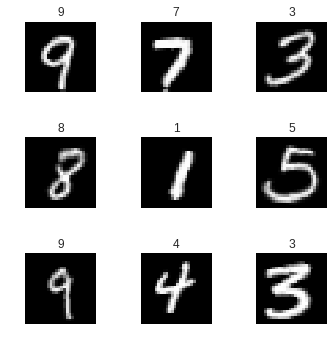

In [9]:
data_mnist.show_batch(rows=3,figsize=(5,5))

In [10]:
data_mnist.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (60000 items)
x: ImageList
Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26)
y: CategoryList
6,6,6,6,6
Path: /root/.fastai/data/mnist_png;

Valid: LabelList (10000 items)
x: ImageList
Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26)
y: CategoryList
6,6,6,6,6
Path: /root/.fastai/data/mnist_png;

Test: None

In [11]:
learn_mnist = cnn_learner(data_mnist,models.resnet34,metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
87306240it [00:01, 75844214.26it/s]


In [12]:
learn_mnist.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.591585,0.339123,0.112700,02:48
1,0.263100,0.109924,0.033100,02:48
2,0.186281,0.072811,0.022600,02:40
3,0.155108,0.067418,0.020600,02:37


In [13]:
learn_mnist.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


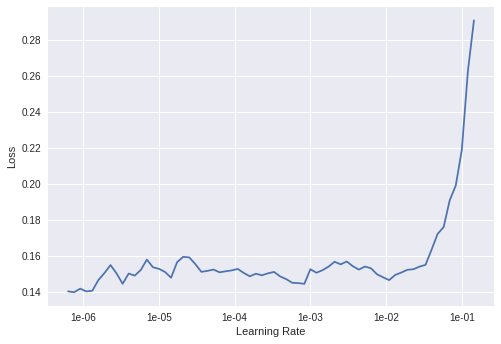

In [14]:
learn_mnist.recorder.plot()

# FOOD

In [15]:
!wget http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz

--2019-03-30 06:52:17--  http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
Resolving data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)... 129.132.52.162
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.162|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz [following]
--2019-03-30 06:52:17--  https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.162|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4996278331 (4.7G) [application/x-gzip]
Saving to: ‘food-101.tar.gz’

food-101.tar.gz     100%[===================>]   4.65G  3.62MB/s    in 21m 26s 

2019-03-30 07:13:44 (3.71 MB/s) - ‘food-101.tar.gz’ saved [4996278331/4996278331]



In [0]:
!tar xzf food-101.tar.gz

In [0]:
import os
path_food = '/content/food-101/'
os.makedirs(path_food,exist_ok=True)

In [18]:
%ls{path_food}images

apple_pie/           eggs_benedict/            onion_rings/
baby_back_ribs/      escargots/                oysters/
baklava/             falafel/                  pad_thai/
beef_carpaccio/      filet_mignon/             paella/
beef_tartare/        fish_and_chips/           pancakes/
beet_salad/          foie_gras/                panna_cotta/
beignets/            french_fries/             peking_duck/
bibimbap/            french_onion_soup/        pho/
bread_pudding/       french_toast/             pizza/
breakfast_burrito/   fried_calamari/           pork_chop/
bruschetta/          fried_rice/               poutine/
caesar_salad/        frozen_yogurt/            prime_rib/
cannoli/             garlic_bread/             pulled_pork_sandwich/
caprese_salad/       gnocchi/                  ramen/
carrot_cake/         greek_salad/              ravioli/
ceviche/             grilled_cheese_sandwich/  red_velvet_cake/
cheesecake/          grilled_salmon/           risotto/
cheese_plate/     

In [0]:
data_food = ImageDataBunch.from_folder(path_food,train='images',valid_pct=0.2, ds_tfms=tfms,size=224,bs=64).normalize(imagenet_stats)

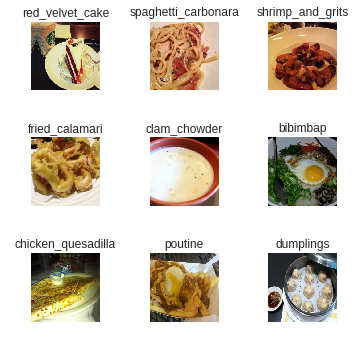

In [20]:
data_food.show_batch(rows=3,figsize=(5,5))

In [0]:
learn_food = cnn_learner(data_food,models.resnet34,metrics=error_rate)

In [27]:
learn_food.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,time
0,1.694692,1.346545,0.352921,37:29
1,1.491003,1.241587,0.323911,37:45


In [0]:
interp_food = ClassificationInterpretation.from_learner(learn_food)

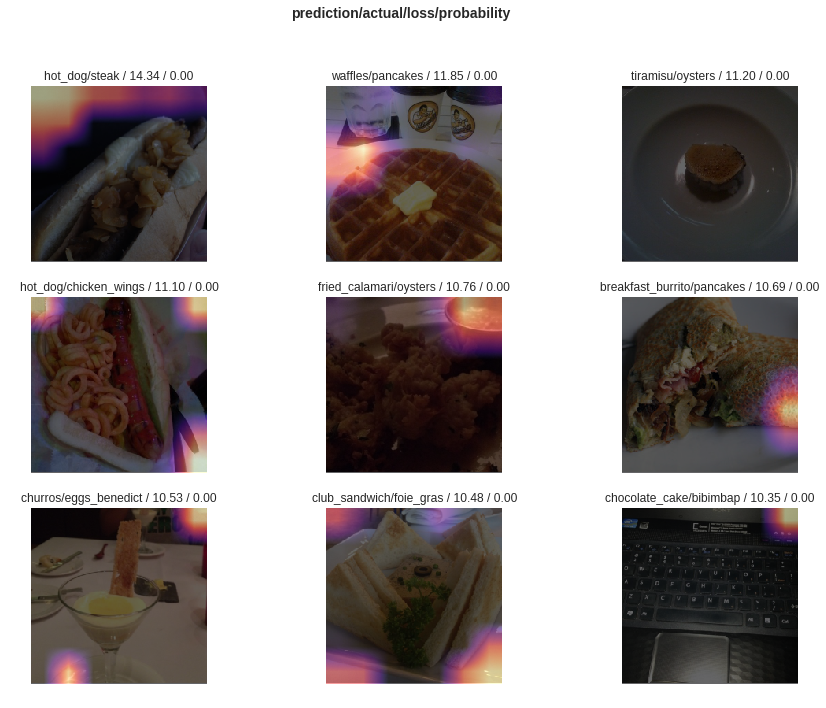

In [24]:
interp_food.plot_top_losses(9,figsize=(15,11))

In [25]:
learn_food.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


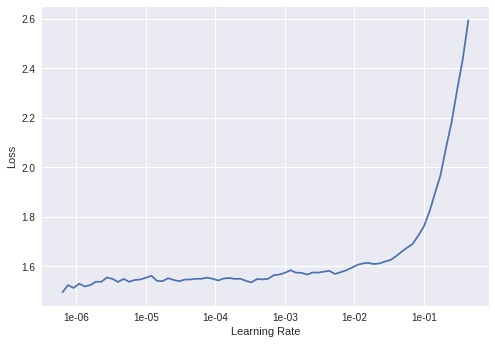

In [26]:
learn_food.recorder.plot()

In [0]:
learn_food.save('stage1')

In [29]:
learn_food.load('stage1')

Learner(data=ImageDataBunch;

Train: LabelList (80800 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
fish_and_chips,fish_and_chips,fish_and_chips,fish_and_chips,fish_and_chips
Path: /content/food-101;

Valid: LabelList (20200 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
pancakes,hummus,panna_cotta,garlic_bread,sashimi
Path: /content/food-101;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    

In [0]:
learn_food.unfreeze()

In [33]:
learn_food.fit_one_cycle(5,max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,1.379986,1.182443,0.307970,36:39
1,1.267175,1.090189,0.285297,36:55
2,1.179188,1.030147,0.270396,37:18
3,1.078632,1.004421,0.264505,37:16
4,1.057969,0.999681,0.261733,36:46


In [0]:
learn_food.save('final model')